<a href="https://colab.research.google.com/github/Karmabir-Brahma/ML/blob/master/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import pandas as pd

In [3]:
path = "/content/drive/MyDrive/train.csv"
train_df = pd.read_csv(path)

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print(train_df['target'][62])

0


In [6]:
print(f'Shape of data: {train_df.shape}')

Shape of data: (7613, 5)


In [7]:
# Find the number of missing values
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [8]:
#Fitting to the input data
tokenizer = Tokenizer(num_words=700, oov_token='OOV')
tokenizer.fit_on_texts(train_df.head()['text'])

In [9]:
#Tokens
word_index = tokenizer.word_index
print(word_index)

{'OOV': 1, 'are': 2, 'in': 3, 'this': 4, 'all': 5, 'evacuation': 6, 'orders': 7, 'wildfires': 8, 'from': 9, 'our': 10, 'deeds': 11, 'the': 12, 'reason': 13, 'of': 14, 'earthquake': 15, 'may': 16, 'allah': 17, 'forgive': 18, 'us': 19, 'forest': 20, 'fire': 21, 'near': 22, 'la': 23, 'ronge': 24, 'sask': 25, 'canada': 26, 'residents': 27, 'asked': 28, 'to': 29, "'shelter": 30, "place'": 31, 'being': 32, 'notified': 33, 'by': 34, 'officers': 35, 'no': 36, 'other': 37, 'or': 38, 'shelter': 39, 'place': 40, 'expected': 41, '13': 42, '000': 43, 'people': 44, 'receive': 45, 'california': 46, 'just': 47, 'got': 48, 'sent': 49, 'photo': 50, 'ruby': 51, 'alaska': 52, 'as': 53, 'smoke': 54, 'pours': 55, 'into': 56, 'a': 57, 'school': 58}


In [10]:
#Generate text sequence
sequence = tokenizer.texts_to_sequences(train_df.head()['text'])
print(sequence)

[[10, 11, 2, 12, 13, 14, 4, 15, 16, 17, 18, 19, 5], [20, 21, 22, 23, 24, 25, 26], [5, 27, 28, 29, 30, 3, 31, 2, 32, 33, 34, 35, 36, 37, 6, 38, 39, 3, 40, 7, 2, 41], [42, 43, 44, 45, 8, 6, 7, 3, 46], [47, 48, 49, 4, 50, 9, 51, 52, 53, 54, 9, 8, 55, 56, 57, 58]]


In [11]:
padded = pad_sequences(sequence, padding='post')
print(padded)

[[10 11  2 12 13 14  4 15 16 17 18 19  5  0  0  0  0  0  0  0  0  0]
 [20 21 22 23 24 25 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5 27 28 29 30  3 31  2 32 33 34 35 36 37  6 38 39  3 40  7  2 41]
 [42 43 44 45  8  6  7  3 46  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [47 48 49  4 50  9 51 52 53 54  9  8 55 56 57 58  0  0  0  0  0  0]]


In [12]:
# Splitting the data into 2/3 as train and 1/3 as test
X_train, X_test, y_train, y_test = train_test_split(train_df['text'], train_df['target'], test_size=0.33, random_state=42)

In [13]:
print(X_train)

5836    Photo: postapocalypticflimflam: Prodding aroun...
30                                               The end!
1879    Man crush everyday ????  @CristianInspire http...
6852    @PTSD_Chat Yes. I feel the root of that is Sha...
2673    @AutoAmes everyone hoped we would join ISIS an...
                              ...                        
5226    @Eganator2000 There aren't many Obliteration s...
5390    just had a panic attack bc I don't have enough...
860     Omron HEM-712C Automatic Blood Pressure Monito...
7603    Officials say a quarantine is in place at an A...
7270    I moved to England five years ago today. What ...
Name: text, Length: 5100, dtype: object


In [14]:
print(y_train)

5836    0
30      0
1879    0
6852    1
2673    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 5100, dtype: int64


In [15]:
print(X_test)

2644    So you have a new weapon that can cause un-ima...
2227    The f$&amp;@ing things I do for #GISHWHES Just...
5448    DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...
132     Aftershock back to school kick off was great. ...
6845    in response to trauma Children of Addicts deve...
                              ...                        
485                          @messeymetoo I feel attacked
2239    Here I'm the UK there isn't a deluge of Canadi...
3653    ...American casualties including 400000ÛÒ8000...
3469    EE recalls Power Bar phone chargers after expl...
6111    Sinking the Slipper or Putting the Boot In htt...
Name: text, Length: 2513, dtype: object


In [16]:
print(y_test)

2644    1
2227    0
5448    1
132     0
6845    0
       ..
485     0
2239    1
3653    1
3469    1
6111    0
Name: target, Length: 2513, dtype: int64


In [17]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type='post'
oov_tok = "<OOV>"

# Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
testing_sequences = tokenizer.texts_to_sequences(X_test)

# Padding
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)  # 
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)  # , maxlen=max_length

In [18]:
padded.shape

(5100, 50)

In [19]:
testing_padded.shape

(2513, 50)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 6)                 4806      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 12,813
Trainable params: 12,813
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 10
history = model.fit(padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/10
160/160 [==============================] - 2s 5ms/step - loss: 0.6594 - accuracy: 0.6063 - val_loss: 0.6234 - val_accuracy: 0.6685
Epoch 2/10
160/160 [==============================] - 1s 4ms/step - loss: 0.5778 - accuracy: 0.7153 - val_loss: 0.5468 - val_accuracy: 0.7437
Epoch 3/10
160/160 [==============================] - 1s 4ms/step - loss: 0.4878 - accuracy: 0.7804 - val_loss: 0.5087 - val_accuracy: 0.7600
Epoch 4/10
160/160 [==============================] - 0s 3ms/step - loss: 0.4362 - accuracy: 0.8071 - val_loss: 0.4997 - val_accuracy: 0.7604
Epoch 5/10
160/160 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8227 - val_loss: 0.4992 - val_accuracy: 0.7732
Epoch 6/10
160/160 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8398 - val_loss: 0.5076 - val_accuracy: 0.7620
Epoch 7/10
160/160 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8486 - val_loss: 0.5304 - val_accuracy: 0.7640
Epoch 

In [22]:
# Getting weights from the embedding
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

# Reverse mapping function from token to word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

(500, 16)


In [23]:
# Combining embedding and words into a DataFrame
embedding_df = pd.DataFrame()
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    embedding_df = embedding_df.append(pd.Series({'word':word, 'em':embeddings}), ignore_index=True)
    
embedding_df = pd.concat([embedding_df['em'].apply(pd.Series), embedding_df['word']], axis=1)

In [24]:
# Using PCA to map 16 embedding values to 3 to plot
p = PCA(n_components=3)
principal_components = p.fit_transform(embedding_df.filter(regex=r'\d'))
embedding_df[['x', 'y', 'z']] = pd.DataFrame(principal_components)

embedding_df.shape

(499, 20)

In [25]:
fig = px.scatter_3d(embedding_df, x='x', y='y', z='z', hover_name='word', color='x')
fig.show()

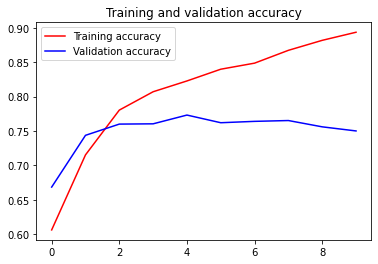

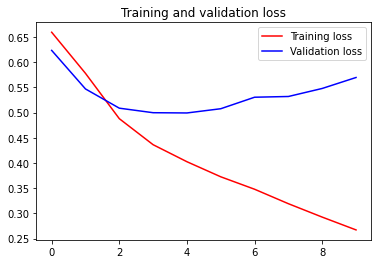

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

Think of loss as the error in prediction. With increasing epochs the training accuracy increases constantly while the validation accuracy increases then slowly decreases as overfitting occurs. With increasing epoch the training loss decreases constantly while validation loss decreases first than slowly increases.